In [1]:
# Students need to run the 2 lines bellow
#pip install imblearn
#pip install cufflinks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = 2000

import warnings
warnings.filterwarnings('ignore')

# Look at our data

In [4]:
# Load data
insurance_df = pd.read_csv('insurance_claims.csv')

In [5]:
#insurance_df.shape?

In [6]:
insurance_df.shape

(1000, 39)

In [7]:
# Size of your data
print('Rows: ', insurance_df.shape[0])
print('Columns: ', insurance_df.shape[1])

Rows:  1000
Columns:  39


In [7]:
# Columns
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
# Data types
insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
# Look at data
insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [10]:
# Look at the column insured_sex
insurance_df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [11]:
insurance_df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [12]:
# 537+463 - no missing values

In [13]:
column_sex = insurance_df['insured_sex']

In [14]:
#type(column_sex)

In [15]:
#column_sex.value_counts?

# Descriptive Statistics

In [16]:
insurance_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [17]:
columns = ['capital-gains', 'capital-loss', 'total_claim_amount']

insurance_df[columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capital-gains,1000.0,25126.10,27872.187708,0.0,0.0,0.0,51025.0,100500.0
capital-loss,1000.0,-26793.70,28104.096686,-111100.0,-51500.0,-23250.0,0.0,0.0
total_claim_amount,1000.0,52761.94,26401.533190,100.0,41812.5,58055.0,70592.5,114920.0


In [18]:
# We have many columns, let's inverse the stats
insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


# Look at target variable
- Fraud Reported

In [19]:
# See how many fraud cases Y=Yes(Fraud sample) and N=No(Not a Fraud sample)
insurance_df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [20]:
condition = insurance_df['fraud_reported']=='Y'

# Create a pandas dataframe only with Fraud samples to better understand it
fraud_df = insurance_df[condition]

In [21]:
fraud_df.shape

(247, 39)

In [22]:
# Here we should only have Fraud cases
fraud_df['fraud_reported'].value_counts()

Y    247
Name: fraud_reported, dtype: int64

In [23]:
#sns.distplot?

In [24]:
type(fraud_df['age'])

pandas.core.series.Series

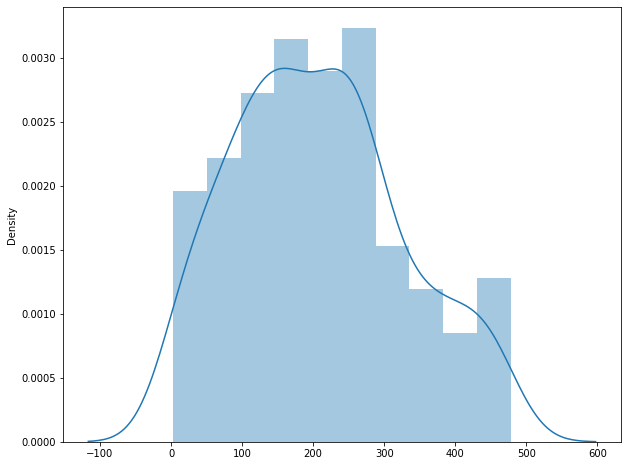

In [27]:
# How can we build a density plot
column_name = ['age']

plt.figure(figsize=(10,8))

sns.distplot(fraud_df[column_name])

plt.show()

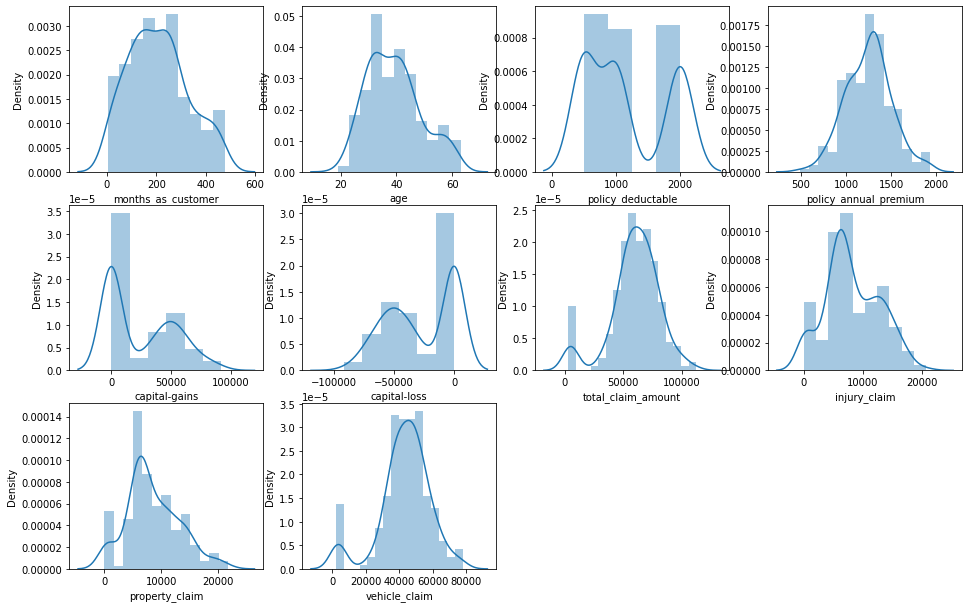

In [39]:
# Build density plots for more than one feature/attribute at the same time
columns_to_observe=[
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'capital-gains',
    'capital-loss',
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim'
]

plt.figure(figsize=(16,14))

k=1
for i in columns_to_observe:
    plt.subplot(4, 4, k)
    
    sns.distplot(fraud_df[i])
    
    k=k+1
    
plt.show()

- For all columns we observe an approximation to the normal distribution

# Visual inspection to understand if,
## the longer a customer is in the company more/less likely will submit a fraud insurance claim?

In [40]:
insurance_df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

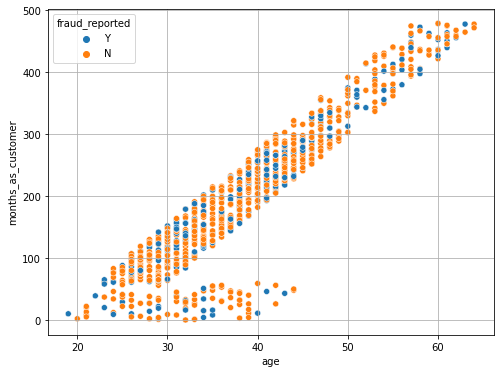

In [43]:
# Build a scatter plot here
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='age',
    y='months_as_customer',    
    hue='fraud_reported',    
    data=insurance_df,
)


plt.grid(True)
plt.show()

- There's no obvious pattern that indicates that customers with more years in the company are more/less likely to submit a fraud insurance claim

# Visual inspection to understand if,
## age is correlated with fraud insuarance claims

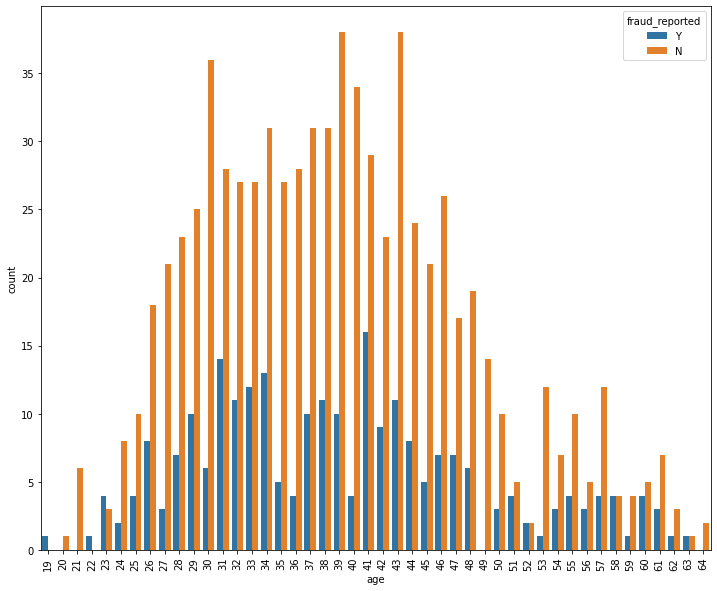

In [44]:
# Build a histogram plot
plt.figure(figsize=(12,10))
sns.countplot(
    x='age',
    hue='fraud_reported',
    data=insurance_df,
)
plt.xticks(rotation=90)
plt.show()

- Again, we do not see any trend to fraud related to the consumer age

# Let's now observe insurance policy, occupation and education
## Is there any spike that might raise a flag?

In [55]:
fraud_df.shape

(247, 39)

In [ ]:
#fraud_df.sort_values?

In [60]:
# Subset of features we are interested in
columns_to_observe = \
['policy_number',
 'insured_occupation',
 'insured_education_level',
 'total_claim_amount',
]

# Top 20 most frequent frauds for combination from the columns above
fraud_df[columns_to_observe].sort_values('total_claim_amount',
                                         ascending=False)[:5].reset_index()

,index,policy_number,insured_occupation,insured_education_level,total_claim_amount
0,149,217938,craft-repair,JD,112320
1,163,346940,prof-specialty,Masters,107900
2,479,753844,sales,MD,104610
3,145,515050,exec-managerial,Associate,99320
4,247,187775,other-service,JD,98670


- Insurance Occupation craft-repair with Policy Number 217938 has claimed the highest amount of Fraud Claims with a total of \$112.320

## What about Education Level and Insured Occupation?

In [61]:
fraud_df['insured_education_level'].value_counts()

JD             42
MD             38
High School    36
Associate      34
PhD            33
Masters        32
College        32
Name: insured_education_level, dtype: int64

In [62]:
fraud_df['insured_occupation'].value_counts()

exec-managerial      28
tech-support         22
craft-repair         22
machine-op-inspct    22
sales                21
transport-moving     21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
other-service        12
priv-house-serv      12
handlers-cleaners    11
adm-clerical         11
Name: insured_occupation, dtype: int64

# Let's visualized Insurance Education Level and Insurance Occupation
## Data bellow is only for Fraud Claims

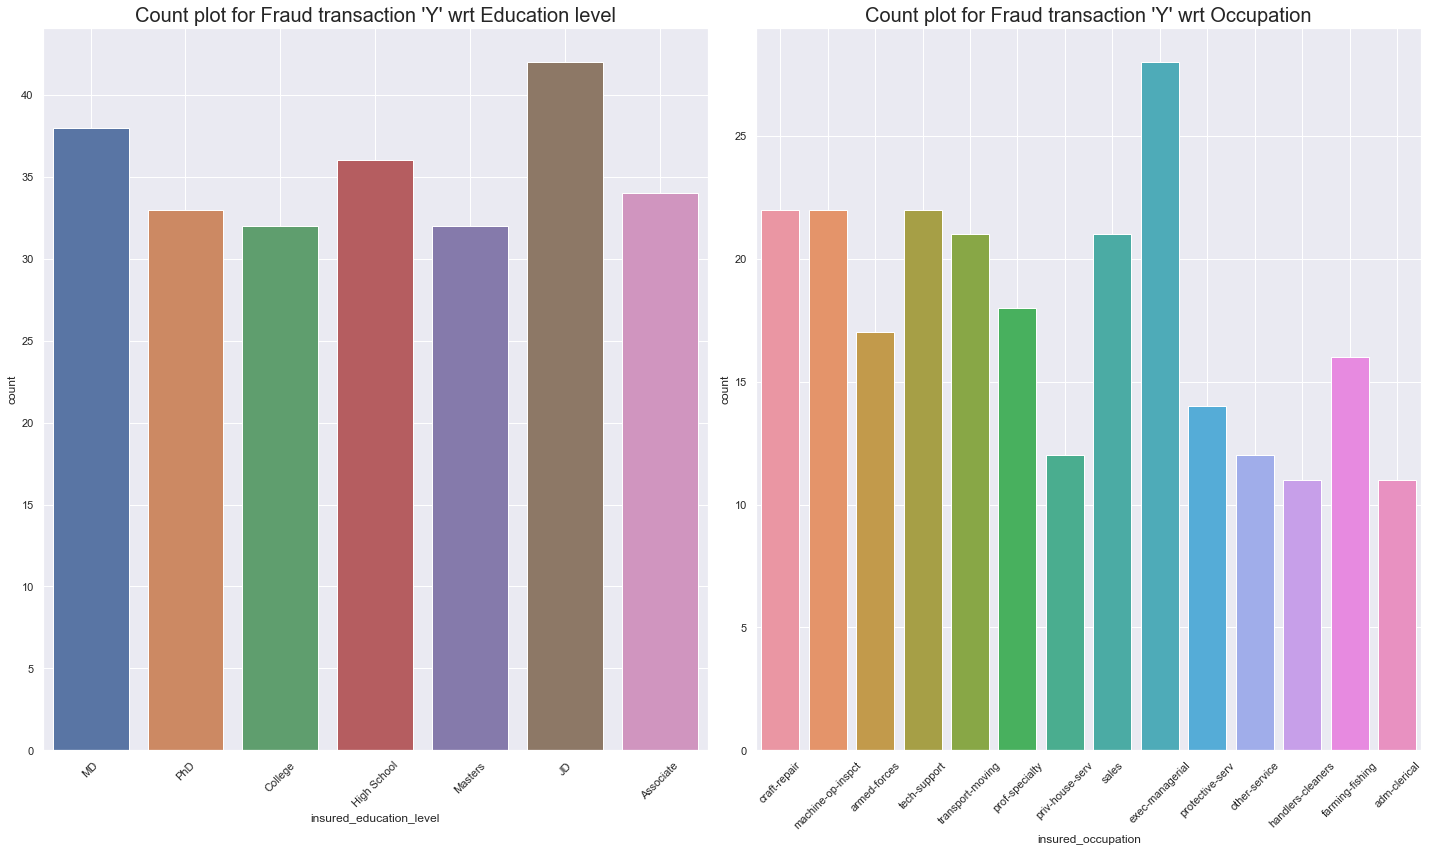

In [63]:
sns.set(style="darkgrid")

plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
plt.title("Count plot for Fraud transaction 'Y' wrt Education level",fontsize=20)

# plot 1 here
sns.countplot(
    'insured_education_level',
    data = fraud_df,
)


plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.subplot(1,2,2)
plt.title("Count plot for Fraud transaction 'Y' wrt Occupation",fontsize=20)


# plot 2 here
sns.countplot(
    'insured_occupation',
    data = fraud_df,
)


plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- It seems that customers with occupation as Exec-Managerial are more related to Fraud Transactions
- JD level of education are also involved in more fraud transactions

# Let's combine them together and understand it better

In [64]:
fraud_df.shape

(247, 39)

In [71]:
# Looking at below claims
# pivot here
fraud_claims_pivot=\
pd.pivot_table(
    fraud_df,
    values='total_claim_amount',
    index=[
        'insured_occupation',
        'insured_education_level'
    ]
).sort_values('total_claim_amount', ascending=False)

In [73]:
cm = sns.light_palette("purple", as_cmap=True)

fraud_claims_pivot.style.background_gradient(cmap=cm)

- People from occupation sector Protective-services and education level of JD has highest fraud claimed amount of 87,890\$

# Does customers hobbies tell us anything about Fraud?

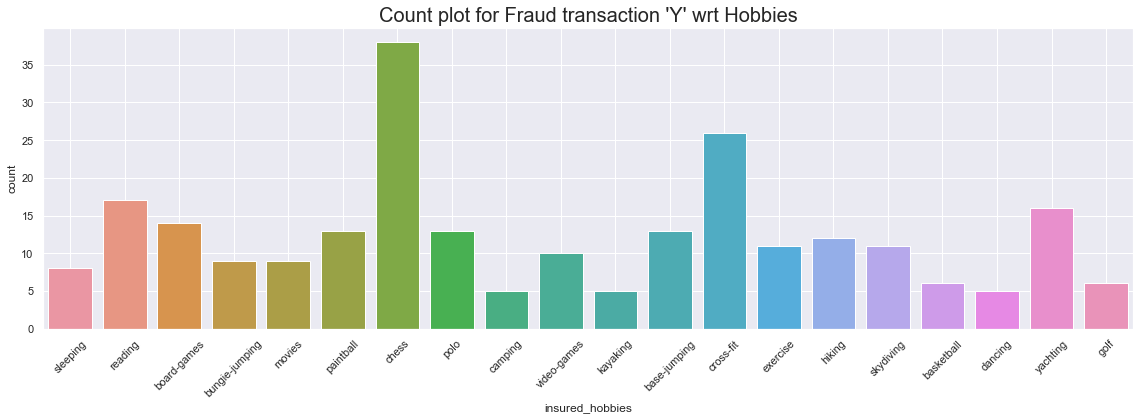

In [74]:
plt.figure(figsize=(16,6))
plt.title("Count plot for Fraud transaction 'Y' wrt Hobbies",fontsize=20)

# count plot here
sns.countplot(
    'insured_hobbies',
    data = fraud_df
)

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- People who play more chess have claimed more fraud followed by crossfit

# What about gender?

In [76]:
sns.barplot?

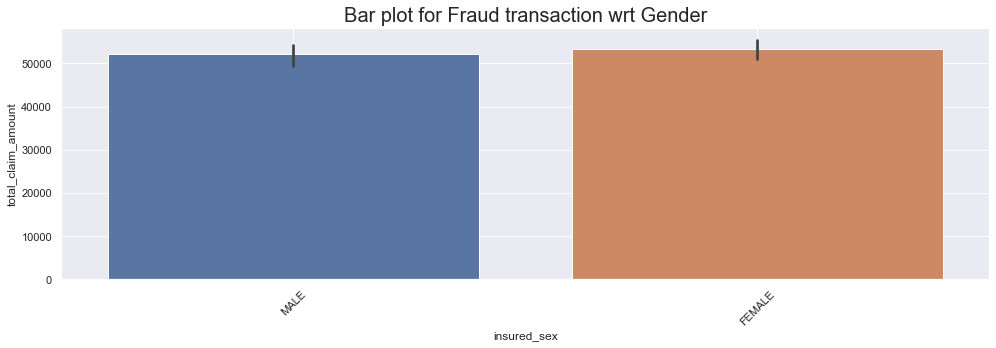

In [75]:
plt.figure(figsize=(14,5))
plt.title("Bar plot for Fraud transaction wrt Gender",fontsize=20)

# bar plot here
sns.barplot(
    x='insured_sex',
    y='total_claim_amount',
    data=insurance_df
)


plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- No clear evidence there's a difference between Male and Female

## Observe if there's anything about the Incident Type & Collision that trigger more insurance claims

In [77]:
columns_to_observe = [
    'number_of_vehicles_involved',
    'total_claim_amount',
    'vehicle_claim',
    'incident_hour_of_the_day',
]

# Pivot table for incident and collision type, order by vehicle_claim
pd.pivot_table(
    fraud_df,
    values=columns_to_observe,
    index=[
        'incident_type',
        'collision_type',
    ]
).sort_values('vehicle_claim', ascending=False)

incident_hour_of_the_day  \
incident_type            collision_type                              
Single Vehicle Collision Front Collision                 11.595238   
                         Side Collision                  11.787879   
                         Rear Collision                  11.071429   
Multi-vehicle Collision  Side Collision                  11.432432   
                         Front Collision                 11.892857   
                         Rear Collision                  14.142857   
Parked Car               ?                                7.000000   
Vehicle Theft            ?                                5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Single Vehicle Collision Front Collision                     1.000000   
                         Side Collision                      1.000000   
                         Rear Collision                      1.000000   
Multi-vehicle Collision  Side Collision                      2.972973   
                         Front Collision                     2.964286   
                         Rear Collision                      3.081633   
Parked Car               ?                                   1.000000   
Vehicle Theft            ?                                   1.000000   

                                          total_claim_amount  vehicle_claim  
incident_type            collision_type                                      
Single Vehicle Collision Front Collision        66596.190476   49030.000000  
                         Side Collision         68009.696970   48481.212121  
                         Rear Collision         65782.857143   47616.666667  
Multi-vehicle Collision  Side Collision         62281.621622   45308.648649  
                         Front Collision        60970.000000   43860.000000  
                         Rear Collision         61152.448980   43474.693878  
Parked Car               ?                       5093.750000    3711.250000  
Vehicle Theft            ?                       5197.500000    3665.000000

# Profit per policy number - who are the most valuable customers?

In [80]:
insurance_df[['capital-gains', 'capital-loss']].head(10)

,capital-gains,capital-loss
0,53300,0
1,0,0
2,35100,0
3,48900,-62400
4,66000,-46000
5,0,0
6,0,-77000
7,0,0
8,0,0
9,0,-39300


In [89]:
# calculate profit
insurance_df['profit'] = insurance_df['capital-gains'] + insurance_df['capital-loss']

In [90]:
insurance_df[['capital-gains', 'capital-loss', 'profit']].head(10)

,capital-gains,capital-loss,profit
0,53300,0,53300
1,0,0,0
2,35100,0,35100
3,48900,-62400,-13500
4,66000,-46000,20000
5,0,0,0
6,0,-77000,-77000
7,0,0,0
8,0,0,0
9,0,-39300,-39300


In [86]:
insurance_df.shape

(1000, 40)

In [91]:
# Top 10 more profitable insurances
insurance_df[['capital-gains', 'capital-loss', 'profit']].sort_values('profit', ascending=False)[:10]

,capital-gains,capital-loss,profit
816,100500,0,100500
272,91900,0,91900
171,88800,0,88800
135,84900,0,84900
759,83600,0,83600
429,82200,0,82200
656,82100,0,82100
380,81800,0,81800
310,81300,0,81300
32,81100,0,81100


# Build model

## Prepare Dataset

In [97]:
# Clean non-interesting Labels
insurance_df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [98]:
insurance_df['police_report_available'] = \
insurance_df['police_report_available'].replace('?', 'UNKNOWN')

In [99]:
insurance_df['police_report_available'].value_counts()

UNKNOWN    343
NO         343
YES        314
Name: police_report_available, dtype: int64

In [100]:
# Remove invalid values e.g. many times system errors
insurance_df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [101]:
# Remove invalid values e.g. many times system errors
insurance_df['umbrella_limit'] = \
insurance_df['umbrella_limit'].replace(-1000000, 0)

# Observe feature after cleaning
insurance_df['umbrella_limit'].value_counts()

0           799
6000000      57
5000000      46
4000000      39
7000000      29
3000000      12
8000000       8
9000000       5
2000000       3
10000000      2
Name: umbrella_limit, dtype: int64

# Remove/Drop non-interesting columns for the model

In [103]:
insurance_df.shape

(1000, 40)

In [104]:
# Columns we do not want to add to the model
columns_to_drop = [
    'policy_number',
    'policy_bind_date',
    'insured_zip',
    'incident_date',
    'authorities_contacted',
    'profit',
    'auto_make',
    'auto_model',
]

# drop columns that we do not need for the model
insurance_df =\
insurance_df.drop(columns_to_drop, axis=1)

In [105]:
insurance_df.shape

(1000, 32)

# Convert categorical variable into dummy/indicator variables

In [113]:
# have a look before changing categorical variable
insurance_df[['insured_sex']].head()

,insured_sex
0,MALE
1,MALE
2,FEMALE
3,FEMALE
4,MALE


In [ ]:
# Example to see how categorical variable insured_sex (MALE or FEMALE) is converted by using get_dummies method


In [108]:
pd.get_dummies?

In [109]:
# Columns to convert from categoric to numeric
columns_to_convert = [
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'incident_state',
    'incident_city',
    'incident_location',
    'property_damage',
    'police_report_available',
]

# change to numeric categoric variables
insurance_train_df = pd.get_dummies(insurance_df, columns=columns_to_convert)

In [115]:
#insurance_train_df[['insured_sex']].head()

In [117]:
insurance_df[['insured_sex']].head()

,insured_sex
0,MALE
1,MALE
2,FEMALE
3,FEMALE
4,MALE


In [116]:
# Remove from dataset the target variable

# Set the target variable
insurance_train_df[['insured_sex_MALE', 'insured_sex_FEMALE']].head()

,insured_sex_MALE,insured_sex_FEMALE
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [118]:
x = insurance_train_df.drop(['fraud_reported'], axis=1)

# Target value
y = insurance_train_df['fraud_reported']

In [119]:
y.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

## We have an imbalanced dataset
### Why? More samples for non-Fraud than Fraud
### Why is it a problem? Model might be biased towards the more representative samples

- Let's use SMOTE: Class to perform over-sampling. This object is an implementation of SMOTE - Synthetic Minority

In [120]:
x_upsample, y_upsample  = SMOTE().fit_resample(x, y)

print(x_upsample.shape)
print(y_upsample.shape)

(1506, 1103)
(1506,)


In [121]:
y_upsample.value_counts()

Y    753
N    753
Name: fraud_reported, dtype: int64

## Normalize features by using Standard Scaler
- Standardize features by removing the mean and scaling to unit variance

In [122]:
sc = StandardScaler()

x_scale = sc.fit_transform(x_upsample)

## We have many features/columns perhaps we can reduce our number of features by creating new ones that are more interesting for the model

- Principal component analysis (PCA). Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [124]:
pca = PCA(n_components=0.95)

x_scale = pca.fit_transform(x_scale)

- 1039 features are converted into 944 principal components which constitutes 95.02% variance.

- The explained variance tells how much information (variance) can be attributed to each of the principal components

In [128]:
# Explainability ration for each dimension basically gives the variance explained solely by the i+1st dimension.
#r = pca.explained_variance_ratio_
#pca.explained_variance_ratio_[i] #gives the variance explained solely by the i+1st dimension.
#np.sum(r)

In [ ]:
# Prepare training and test split for your model


## Build a Random Forest Model
- Do a GridSearch to obtain the best weights for the model

In [129]:
train_test_split?

In [130]:
# Build a RF model
# Takes some time to compute ~5minutes
x_train, x_test, y_train, y_test = \
train_test_split(
    x_scale,
    y_upsample,
    test_size=0.3
)

In [132]:
# Now we know the best estimator and select that model
rf = RandomForestClassifier()

parameters = {
    'criterion':[
        'gini',
        'entropy'
    ],
    'max_depth': np.arange(1,30)
}

grid = GridSearchCV(rf, parameters)


# Find the best parameters for my train data
grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [133]:
# Use the best model to compute predictions (is Fraud or not Fraud) for test set
model = grid.best_estimator_

y_pred = model.predict(x_test)

In [134]:
# Accuracy for how good was our model
accuracy_score(
    y_test,
    y_pred,
)

0.8252212389380531

(0.0, 2.0)

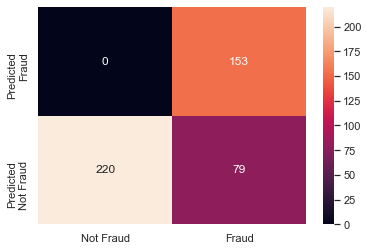

In [135]:
# Confusion matrix
# Diagonal we did well, others is erros as 
# False Positive: Model says is Fraud and is not
# False Negative: Model says is Not-Frayd and it is
cm = confusion_matrix(
    y_pred,
    y_test
)

pred_df = pd.DataFrame(data = cm, columns = ['Fraud', 'Not Fraud'])

x_axis_labels = ['Not Fraud', 'Fraud']
y_axis_labels = ['Predicted\n Not Fraud', 'Predicted\nFraud']

ax = sns.heatmap(pred_df,
                 xticklabels=x_axis_labels,
                 yticklabels = y_axis_labels,
                 annot=True, fmt="g")
ax.set_ylim([0,2])

- Colour Black : False Positive
- Colour Red : False Negative

In [ ]:
# More evaluation metrics
